In [1]:
#Importing Libraries
#These are Python libraries and modules used for data analysis, machine learning, and data visualization.
#'Pandas'library used for data manipulation and analysis. 
#'numpy'library used for numerical computing in Python.
#'sklearn.metrics' a module from the scikit-learn library that provides tools for evaluating machine learning models.
#'seaborn' a data visualization library based on matplotlib.
#'matplotlib' a library used for creating visualizations in Python.
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#df=pd.read_csv('Desktop/breast_cancer.csv'): This line reads a CSV file named "breast_cancer.csv" 
#located on the Desktop directory of the computer and loads it into a pandas DataFrame object named df.
#The read_csv() function is provided by the pandas library and is used to read CSV files into a DataFrame. 
#The file path to the CSV file is specified as a string inside the function.
#df.head(): This line displays the first few rows of the DataFrame df. 
#By default, it shows the first five rows of the DataFrame, but you can specify a different number of rows by passing an integer
#argument inside the parentheses. This method is useful for quickly checking the contents of the DataFrame
#and getting a sense of its structure and contents.
df=pd.read_csv('Desktop/breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
#'df' is the name of the pandas DataFrame object that we are working with.
#'.shape'is a DataFrame attribute that returns the dimensions of the DataFrame.
#When we call df.shape, the output will be a tuple with two values, where the first value represents the number of rows
#in the DataFrame and the second value represents the number of columns.
df.shape

(569, 31)

In [4]:
#The line df.outcome.value_counts() is a Python code that counts the number of occurrences of each unique value 
#in a specific column of a pandas DataFrame.
#'df' is the name of the pandas DataFrame object that we are working with.
#.value_counts() is a pandas Series method that counts the number of occurrences of each unique value 
#in the specified column, and returns a new Series object with the counts sorted in descending order.
df.outcome.value_counts()

0    357
1    212
Name: outcome, dtype: int64

In [5]:
#The line df.info() is a Python code that provides a concise summary of a pandas DataFrame, 
#including the number of non-null values and data types of each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
#The syntax [:, :-1] specifies that we want to select all rows (:) and all columns up to but not including the last column (:-1). 
#The resulting object X will contain only the feature variables of the dataset.
#y=df.outcome: This line selects the last column of the DataFrame df, which is assumed to be the target variable,
#and assigns it to the object y.
X=df.iloc[:, : -1]
y=df.outcome

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [9]:
#train_test_split function is commonly used to split a dataset into separate training and test sets.
#This line uses the train_test_split function to split the feature variables (X) and target variable (y) into separate training
#and test sets. The resulting objects are X_train (training feature variables), X_test (test feature variables),
#y_train (training target variable), and y_test (test target variable). The test_size parameter specifies the proportion of the
#dataset to include in the test set (in this case, 20% of the dataset). The random_state parameter sets the seed for the random
#number generator used by the train_test_split function, ensuring that the split is reproducible.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=47)

In [10]:
#train model
#from sklearn.svm import SVC: This line imports the SVC class from the scikit-learn library.
#model = SVC(): This line creates a new instance of the SVC class and assigns it to the variable model.

from sklearn.svm import SVC
model= SVC()

In [11]:
#This line of Python code uses the fit method of the model object to train the SVM classifier on the training data. 
#The fit method takes two arguments: the feature variables (X_train) and the target variable (y_train).

model.fit(X_train,y_train)

SVC()

In [12]:
#These lines of Python code use the predict method of the model object to make predictions on the test data. 
#The predict method takes one argument: the feature variables of the test data (X_test). 

y_predict=model.predict(X_test)
y_predict

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [13]:
#These lines of Python code use the predict method of the model object to make predictions on the training data. 
#The predict method takes one argument: the feature variables of the training data (X_train).

y_pred_train=model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [14]:
#'accuracy_score': This metric computes the accuracy of the classifier
#'classification_report': This metric generates a report that includes several performance metrics for each class 
#in the target variable, including precision, recall, and F1-score.
#'confusion_matrix': This metric computes a confusion matrix, which is a table that shows the number of true positive, 
#true negative, false positive, and false negative predictions made by the classifier.

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
#accuracy_score function takes two arguments: the true target variable (y_test) and the predicted target variable (y_predict). 
#The accuracy score is a number between 0 and 1 that indicates the proportion of test data points that are correctly 
#classified by the SVM classifier.

acc=accuracy_score(y_test,y_predict)
print(acc)

0.9122807017543859


In [16]:
#accuracy_score function takes two arguments:the true target variable (y_train) and the predicted target variable (y_pred_train).

accuracy_score(y_train,y_pred_train)

0.9230769230769231

In [17]:
#confusion_matrix function takes two arguments: the true target variable (y_test) and the predicted target variable (y_predict).
#The resulting confusion matrix is a table that shows the number of true positive, true negative, false positive, 
#and false negative predictions made by the classifier.

confusion_matrix(y_test,y_predict)

array([[67,  3],
       [ 7, 37]], dtype=int64)

In [18]:
#The classification_report function takes two arguments: the true target variable (y_test) and the predicted target variable 
#(y_predict). The resulting classification report includes several performance metrics for each class in the target variable, 
#including precision, recall, and F1-score.

from sklearn.metrics import classification_report
no_grid_report = classification_report(y_test,y_predict)
print(no_grid_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        70
           1       0.93      0.84      0.88        44

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [19]:
#hyper parameter tuning
#Grid Search cv
#This line of Python code imports the GridSearchCV class from the scikit-learn library, which is used for performing a 
#grid search to find the best hyperparameters for a machine learning model.

from sklearn.model_selection import GridSearchCV

In [20]:
#These lines of Python code define a dictionary parameters that contains the hyperparameters that will be searched over during
#the grid search. The hyperparameters in this case are the SVM kernel (linear or rbf), the regularization parameter C,
#and the kernel coefficient gamma.

parameters={
    'kernel':['linear','rbf'],
    'C':[0.1,0.5,1.0],
    'gamma':[0.01,0.0001]
}
clf = GridSearchCV(SVC(), param_grid=parameters,verbose=2)

clf.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=0.0001, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'gamma': [0.01, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [21]:
#The best_score_ attribute of the GridSearchCV object clf returns the mean cross-validated score of the best estimator.

clf.best_score_

0.9604395604395604

In [22]:
#The best_params_ attribute of the GridSearchCV object clf returns a dictionary of the best hyperparameters
#found during the grid search.

clf.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}

In [23]:
#best paremeters are found
model2= SVC(C=1, gamma=0.01, kernel='linear')

model2.fit(X_train,y_train)

SVC(C=1, gamma=0.01, kernel='linear')

In [24]:
#This line of Python code uses the fitted SVM classifier with the best hyperparameters (stored in clf.best_estimator_)
#to make predictions on the test data X_test. The predictions are stored in y_predict.

y_predict=model2.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
#This line of Python code calculates the accuracy of the predictions made on the test data using the best fitted SVM classifier
#with the optimal hyperparameters. The accuracy_score function from scikit-learn's metrics module is used to calculate the 
#accuracy score between the true labels y_test and the predicted labels y_predict. The accuracy score is then stored in the
#variable acc1 and printed.

acc1=accuracy_score(y_test,y_predict)
print(acc1)

0.956140350877193


In [27]:
pd.crosstab(y_test,y_predict)

col_0,0,1
outcome,,
0,66,4
1,1,43


In [28]:
#This line of Python code generates the classification report for the predictions made on the test data using the best fitted 
#SVM classifier with the optimal hyperparameters. The classification_report function from scikit-learn's metrics module 
#is used to generate the classification report between the true labels y_test and the predicted labels y_predict.

with_grid = classification_report(y_test,y_predict)
print(with_grid)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        70
           1       0.91      0.98      0.95        44

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [29]:
#This line of Python code generates the confusion matrix for the predictions made on the test data using the best fitted SVM 
#classifier with the optimal hyperparameters. The confusion_matrix function from scikit-learn's metrics module is used to
#generate the confusion matrix between the true labels y_test and the predicted labels y_predict.

confusion_matrix(y_test,y_predict)

array([[66,  4],
       [ 1, 43]], dtype=int64)

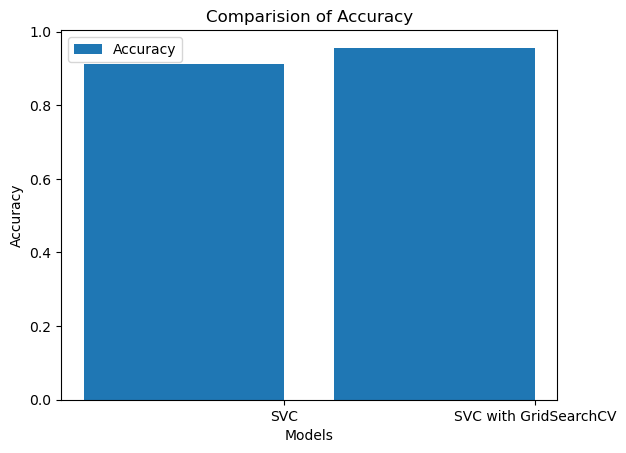

In [30]:
Model = ['SVC','SVC with GridSearchCV']
Acc = [acc,acc1]
X_axis = np.arange(len(Model))
plt.bar(X_axis - 0.4, Acc, 0.8, label = 'Accuracy')
plt.xticks(X_axis, Model)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparision of Accuracy")
plt.legend()
plt.show()